In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn') # theme

In [8]:
year = [1950, 1951, 1952, 1953, 1954]
pop = [2.53, 2.57, 2.62, 2.67, 2.71]

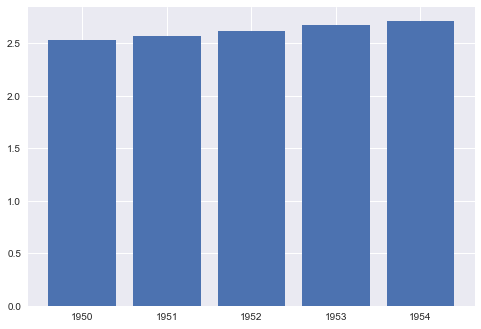

In [9]:
plt.bar(year, pop)
plt.show()

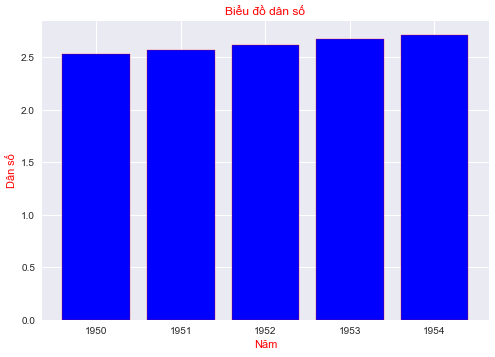

In [10]:
plt.bar(year, pop, color='b', align='center', edgecolor='r')
plt.title('Biểu đồ dân số',color="red")
plt.ylabel('Dân số', color="red")
plt.xlabel('Năm', color="red")
plt.show()

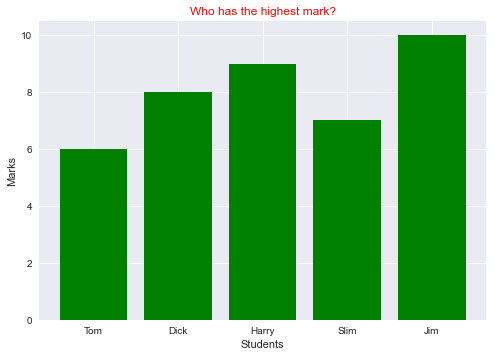

In [11]:
# create data
people = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim']
marks = [6, 8, 9, 7, 10]

# Vertical bar chart
plt.bar(people, marks, align='center', color='green', ecolor='black')
plt.ylabel('Marks')
plt.xlabel('Students')
plt.title('Who has the highest mark?', color = 'red')
plt.show()

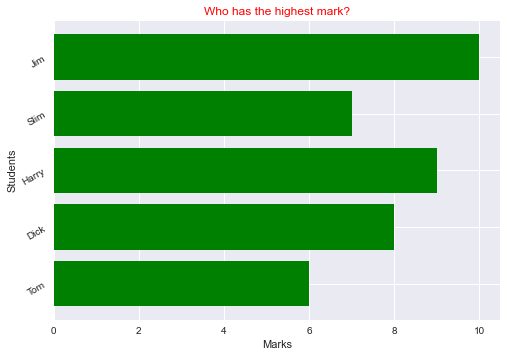

In [12]:
# create data
people = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim']
marks = [6, 8, 9, 7, 10]

# Vertical bar chart
plt.barh(people, marks, align='center', color='green', ecolor='black')
plt.xlabel('Marks')
plt.ylabel('Students')
plt.yticks(rotation=30) 
plt.title('Who has the highest mark?', color = 'red')
plt.show()

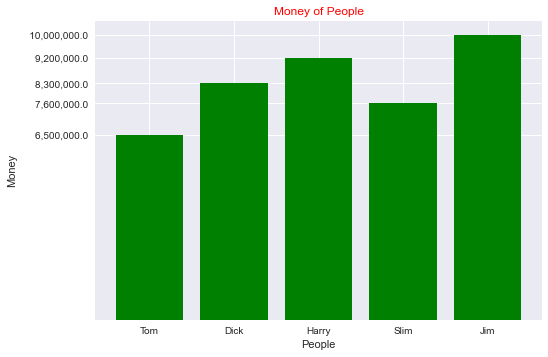

In [13]:
# create data
people = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim']
money = pd.Series([6.5e6, 8.3e6, 9.2e6, 7.6e6, 10.0e6])

# Vertical bar chart
plt.bar(people, money, align='center', color='green', ecolor='black')
plt.ylabel('Money')
plt.yticks(money, money.map(lambda x: '{:15,.1f}'.format(x)))
plt.xlabel('People')
plt.title('Money of People', color = 'red')
plt.show()

In [65]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5'] # có 5 nhóm
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

In [66]:
# group bar
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

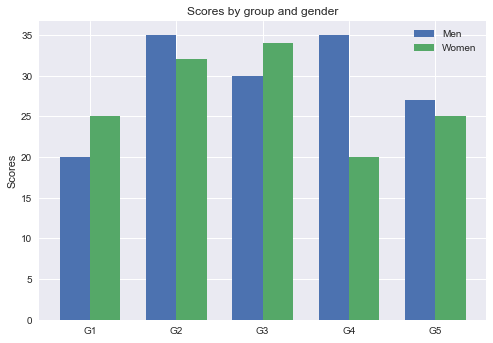

In [70]:
fig, ax = plt.subplots()
ax.bar(x - width/2, men_means, width, label='Men')
ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

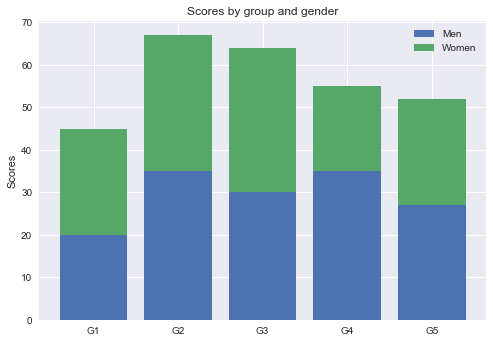

In [17]:
# stacked bar
fig, ax = plt.subplots()

ax.bar(labels, men_means, label='Men')
ax.bar(labels, women_means, bottom=men_means, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [18]:
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
x = np.arange(len(men_means))
w = 0.3

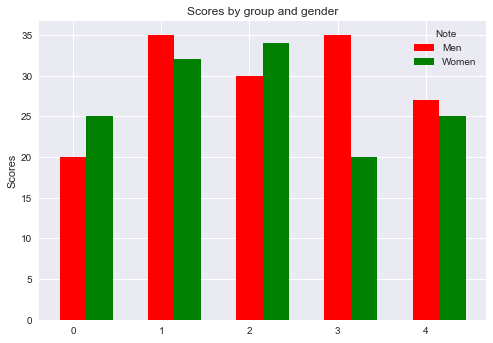

In [19]:
bar_1 = plt.bar(x, men_means, color='r', align='center', width=w)
bar_2 = plt.bar(x+w, women_means, color='g', align='center', width=w)
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.legend([bar_1,bar_2], ['Men','Women'], loc=1, title='Note')

plt.show()

In [20]:
df_meal = pd.read_csv('data/meal_info.csv') 

In [21]:
df_meal.shape

(51, 3)

In [22]:
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [23]:
df_center = pd.read_csv('data/fulfilment_center_info.csv') 

In [24]:
df_center.shape

(77, 5)

In [25]:
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [26]:
df_food = pd.read_csv('data/train_food.csv')

In [27]:
df_food.shape

(456548, 9)

In [28]:
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [29]:
df = pd.merge(df_food, df_center, on='center_id') 
df = pd.merge(df,df_meal, on='meal_id')

In [30]:
data = df.groupby('category', as_index=False).num_orders.sum()

In [31]:
data

,category,num_orders
0,Beverages,40480525
1,Biryani,631848
2,Desert,1940754
3,Extras,3984979
4,Fish,871959
5,Other Snacks,4766293
6,Pasta,1637744
7,Pizza,7383720
8,Rice Bowl,20874063
9,Salad,10944336


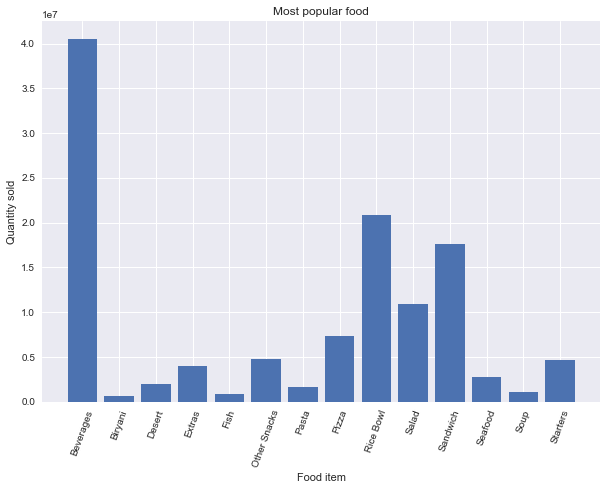

In [32]:
plt.figure(figsize=(10,7))
plt.bar(data['category'], data['num_orders'])
plt.xticks(rotation=70) 
plt.xlabel('Food item') 
plt.ylabel('Quantity sold') 
plt.title('Most popular food') 
plt.show()

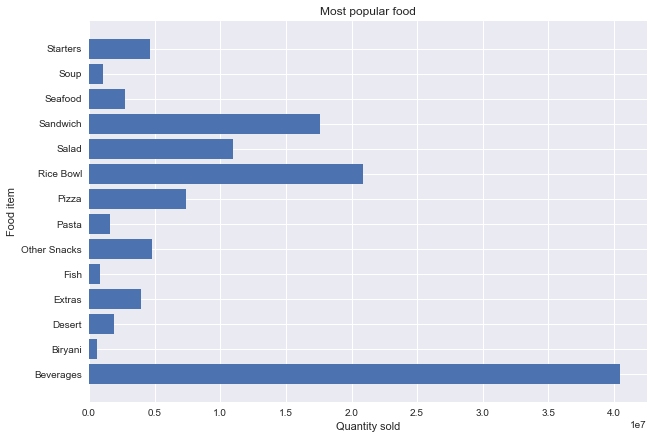

In [33]:
plt.figure(figsize=(10,7))
plt.barh(data['category'], data['num_orders'])
plt.ylabel('Food item') 
plt.xlabel('Quantity sold') 
plt.title('Most popular food') 
plt.show()

In [34]:
data.sort_values(by='num_orders', ascending=False, inplace=True)

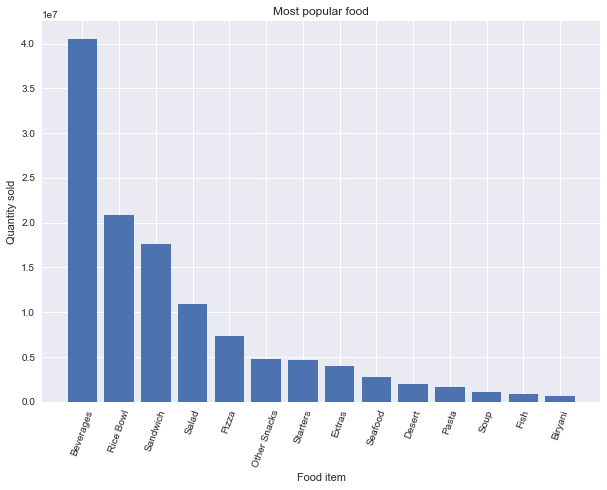

In [35]:
plt.figure(figsize=(10,7))
plt.bar(data['category'], data['num_orders'])
plt.xticks(rotation=70) 
plt.xlabel('Food item') 
plt.ylabel('Quantity sold') 
plt.title('Most popular food') 
plt.show()

In [36]:
df_meal_count = df_meal.groupby('category').size().reset_index()

In [37]:
df_meal_count = df_meal_count.rename(columns={0:'count'})
df_meal_count

,category,count
0,Beverages,12
1,Biryani,3
2,Desert,3
3,Extras,3
4,Fish,3
5,Other Snacks,3
6,Pasta,3
7,Pizza,3
8,Rice Bowl,3
9,Salad,3


In [38]:
data = pd.merge(data,df_meal_count, on='category')
data

,category,num_orders,count
0,Beverages,40480525,12
1,Rice Bowl,20874063,3
2,Sandwich,17636782,3
3,Salad,10944336,3
4,Pizza,7383720,3
5,Other Snacks,4766293,3
6,Starters,4649122,3
7,Extras,3984979,3
8,Seafood,2715714,3
9,Desert,1940754,3


In [39]:
data['num_orders_of_count'] = data['num_orders']/data['count']

In [40]:
data

,category,num_orders,count,num_orders_of_count
0,Beverages,40480525,12,3.373377e+06
1,Rice Bowl,20874063,3,6.958021e+06
2,Sandwich,17636782,3,5.878927e+06
3,Salad,10944336,3,3.648112e+06
4,Pizza,7383720,3,2.461240e+06
5,Other Snacks,4766293,3,1.588764e+06
6,Starters,4649122,3,1.549707e+06
7,Extras,3984979,3,1.328326e+06
8,Seafood,2715714,3,9.052380e+05
9,Desert,1940754,3,6.469180e+05


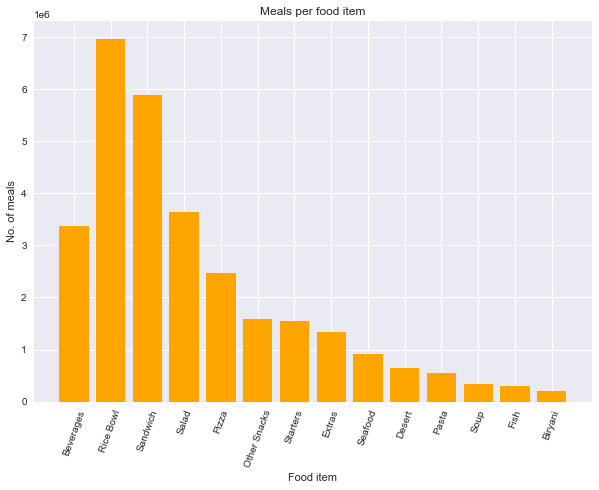

In [41]:
plt.figure(figsize=(10,7))
plt.bar(data['category'], data['num_orders_of_count'],color='orange')
plt.xticks(rotation=70)
plt.xlabel('Food item')
plt.ylabel('No. of meals')
plt.title('Meals per food item')
plt.show()

In [42]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [44]:
titanic.shape

(891, 15)

In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

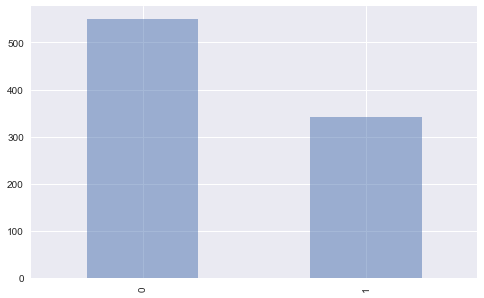

In [47]:
fig = plt.figure(figsize=(8,5)) 
titanic.survived.value_counts().plot(kind="bar",alpha=0.5);

In [48]:
titanic.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

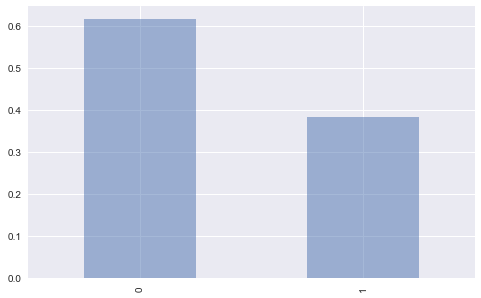

In [49]:
fig = plt.figure(figsize=(8,5)) 
titanic.survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5);

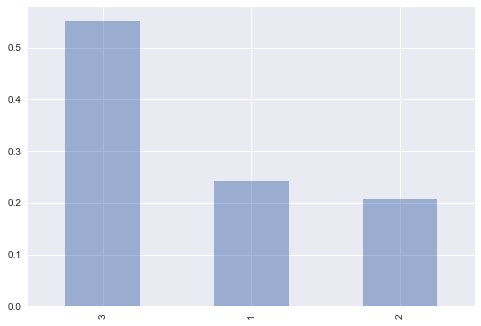

In [50]:
titanic.pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5);

In [51]:
survived = titanic[titanic['survived']==1]['sex'].value_counts()
dead = titanic[titanic['survived']==0]['sex'].value_counts()

In [52]:
df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df

,female,male
survived,233,109
dead,81,468


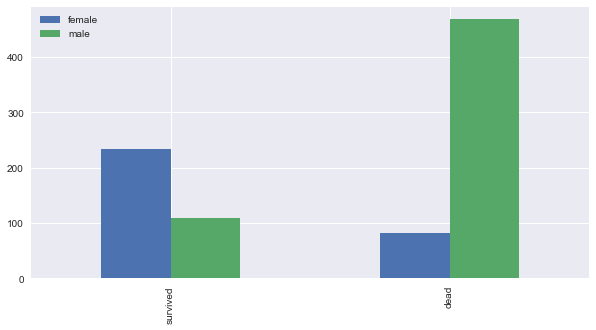

In [53]:
df.plot(kind='bar', figsize=(10,5));

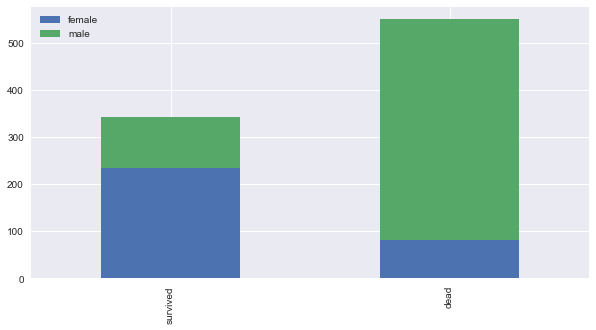

In [54]:
df.plot(kind='bar', stacked=True, figsize=(10,5));

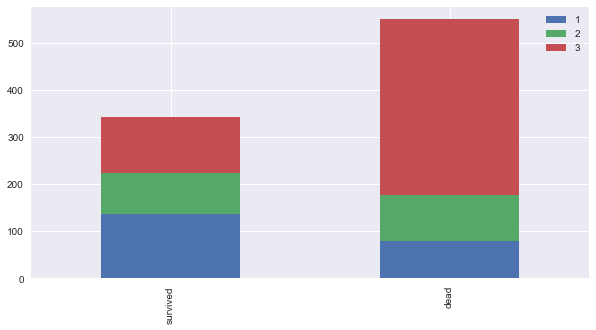

In [55]:
survived = titanic[titanic['survived']==1]['pclass'].value_counts()
dead = titanic[titanic['survived']==0]['pclass'].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df.plot(kind='bar', stacked=True, figsize=(10,5));

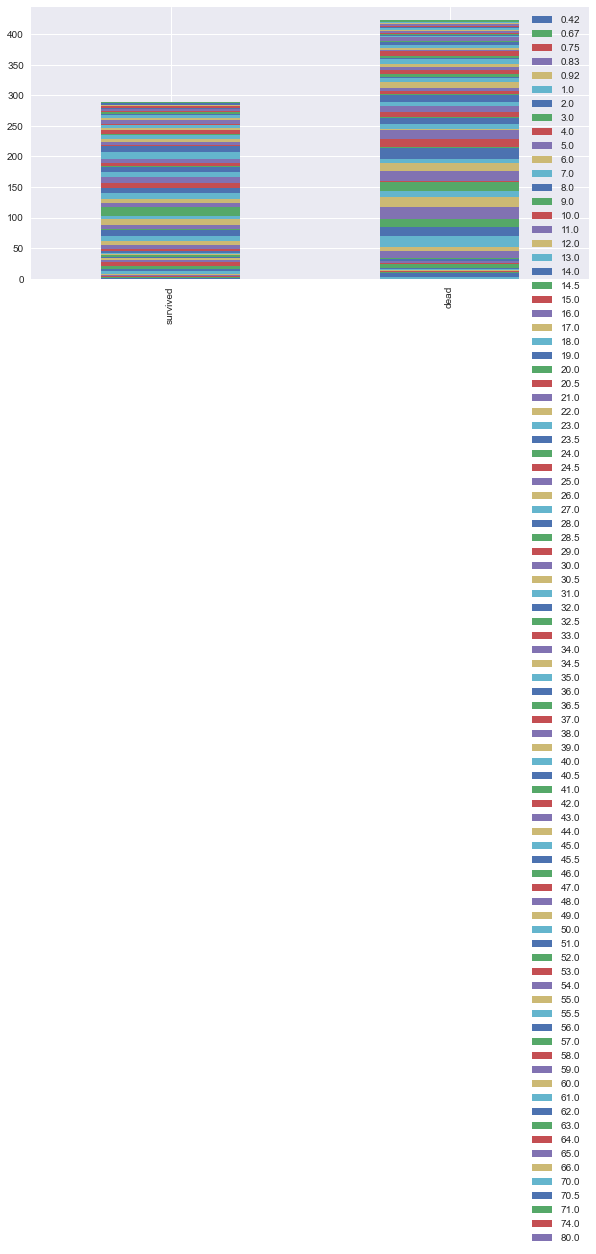

In [56]:
survived = titanic[titanic['survived']==1]['age'].value_counts()
dead = titanic[titanic['survived']==0]['age'].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df.plot(kind='bar', stacked=True, figsize=(10,5));

In [57]:
titanic['age'].min(), titanic['age'].max()

(0.42, 80.0)

In [58]:
titanic.loc[titanic['age']<=15, 'age_id'] = '~15'
titanic.loc[(titanic['age']>15) & (titanic['age']<=25), 'age_id'] = '15~25'
titanic.loc[(titanic['age']>25) & (titanic['age']<=35), 'age_id'] = '25~35'
titanic.loc[(titanic['age']>35) & (titanic['age']<=45), 'age_id'] = '35~45'
titanic.loc[(titanic['age']>45) & (titanic['age']<=55), 'age_id'] = '45~55'
titanic.loc[titanic['age']>55, 'age_id'] = '55~'

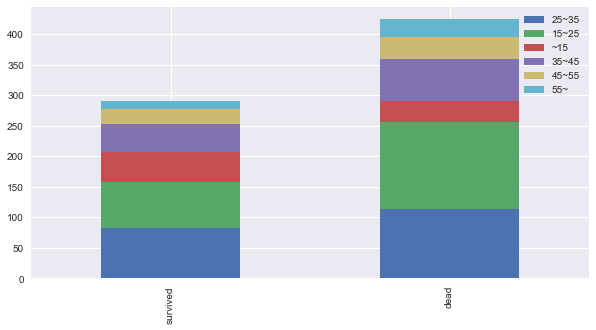

In [59]:
survived = titanic[titanic['survived']==1]['age_id'].value_counts()
dead = titanic[titanic['survived']==0]['age_id'].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df.plot(kind='bar', stacked=True, figsize=(10,5));

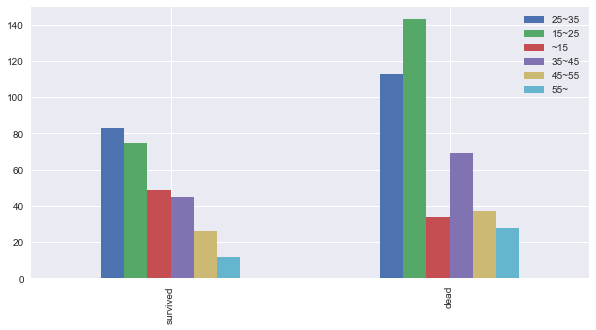

In [60]:
survived = titanic[titanic['survived']==1]['age_id'].value_counts()
dead = titanic[titanic['survived']==0]['age_id'].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df.plot(kind='bar', figsize=(10,5));

In [61]:
df_sex_pclass = pd.crosstab(titanic['sex'], titanic['pclass'])
df_sex_pclass

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


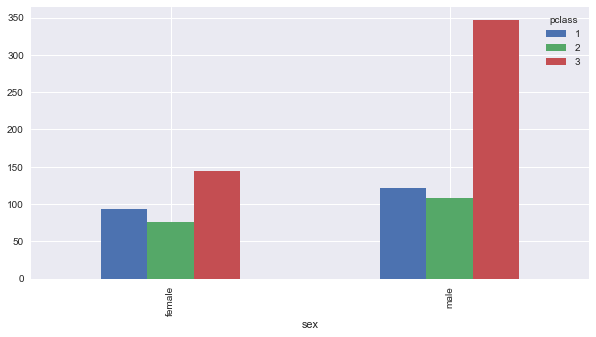

In [62]:
df_sex_pclass.plot(kind='bar', figsize=(10,5));

In [63]:
df_pclass_sex = pd.crosstab(titanic['pclass'], titanic['sex'])
df_pclass_sex

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,347


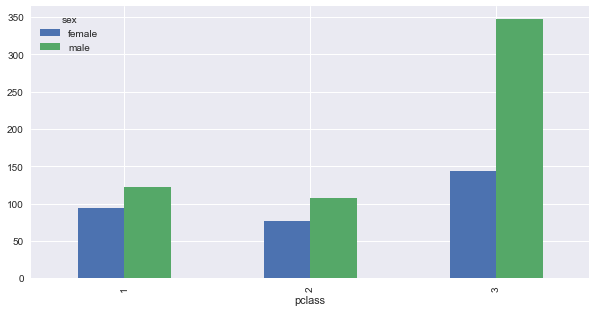

In [64]:
df_pclass_sex.plot(kind='bar', figsize=(10,5));